# Part 4: Choose your own advecnture! (7 Points; Optional for Extra Credit)

I chose to do word frequency over time, specificially analyzing how the frequency of certain words have changed over time based on the presidents speeches. I chose to examine speeches after 2000 and the words "inflation", "climate", "war", "economy" and "immigration". For each speech I processed the text using spaCy and got the lemmatized tokens, then I counted how often each of the words I chose appeared in the speech by lemma, and then divided it by the total number of tokens in the speech to get a relative frequency. I then aggregated all the data into a dataframe which I chose to just  and then plotted the relative frequency by year. 

In [33]:
from collections import Counter
sou_2000 = sou[sou["Year"] >= 2000].reset_index(drop=True)

target_words = ["inflation", "climate", "war", "economy", "immigration"]
target_words = [w.lower() for w in target_words]

def word_frequency_over_time(df, words, nlp_model):
    rows = []

    for _, row in df.iterrows():
        year = row["Year"]
        president = row["President"]
        text = row["Text"]

        doc = nlp_model(text)
        lemmas = [
            token.lemma_.lower()
            for token in doc
            if not token.is_punct and not token.is_space
        ]

        total_tokens = len(lemmas)
        counts = Counter(lemmas)

        for w in words:
            rel_freq = counts[w] / total_tokens if total_tokens > 0 else 0.0
            rows.append(
                {
                    "Year": year,
                    "President": president,
                    "Word": w,
                    "RelFreq": rel_freq,
                }
            )
    return pd.DataFrame(rows)

freq_df = word_frequency_over_time(sou_2000, target_words, nlp)
freq_df

,Year,President,Word,RelFreq
0,2024.0,Joseph R. Biden,inflation,0.000345
1,2024.0,Joseph R. Biden,climate,0.000574
2,2024.0,Joseph R. Biden,war,0.001034
3,2024.0,Joseph R. Biden,economy,0.000804
4,2024.0,Joseph R. Biden,immigration,0.000230
...,...,...,...,...
120,2000.0,William J. Clinton,inflation,0.000000
121,2000.0,William J. Clinton,climate,0.000108
122,2000.0,William J. Clinton,war,0.000324
123,2000.0,William J. Clinton,economy,0.001404


As mentioned earlier, below I created a graph that depicts the word frequency changes in the presidents' speeches over time (specifically after 2000). Some interesting outcomes here can be seen when paried with the political and historical context, for example, "inflation" isn't really part of the speeches  up until the early 2020s, which could be attributed to the surge in inflation that occurred after the pandemic. "Climate" stays relatively low through the 2000s but begins to increase through the 2010s. Although it still is a much lower frequency compared to the other words, it reflects how climate change has been a increasing point of discussion in politics in recent years. "War" has peaks in the early and mid 2000s, which reflects the Iraq and Afghanistan wars, as well as how foreign policy became a larger focus post 9/11. "Economy" consistently appears the most compared to the other words, which makes sense as financial stability as a country is one of the main goals of the president. There's a large spike in its use around 2007-2009, which lines up with the Great Recession that occurred at that time. "Immigration" is used relatively less, but there are some jumps around the mid 2000s and around 2018, reflecting how there were political discussions happening around border security and DACA around those times.   

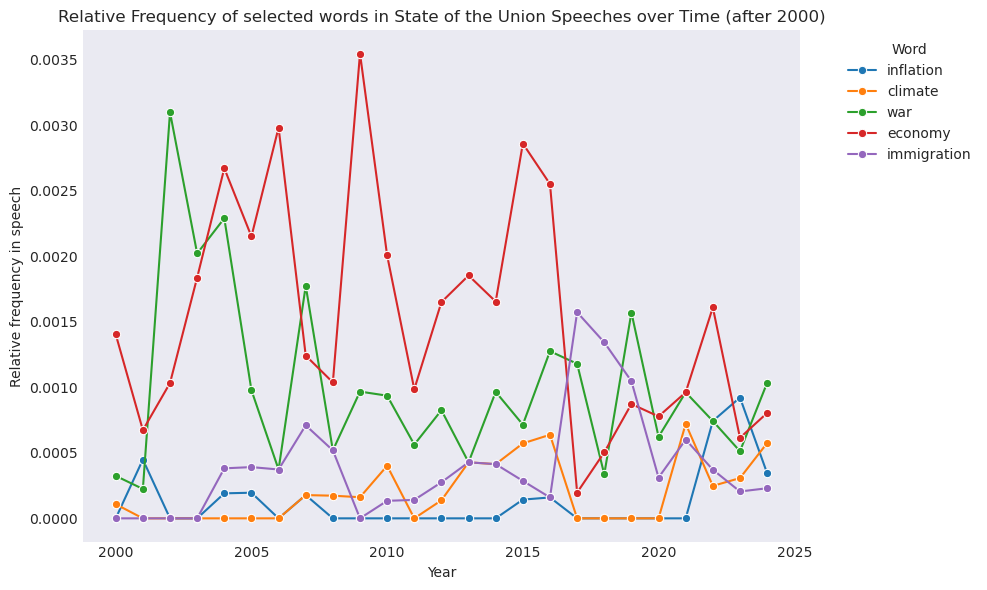

In [34]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=freq_df,
    x="Year",
    y="RelFreq",
    hue="Word",
    marker="o"
)

plt.title("Relative Frequency of selected words in State of the Union Speeches over Time (after 2000)")
plt.ylabel("Relative frequency in speech")
plt.xlabel("Year")
plt.legend(title="Word", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("outputs/04-01_Word_Frequency_Over_Time.png")
plt.show()
